In [3]:
import csv
from operator import itemgetter

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import networkx as nx
from networkx.algorithms import community 

In [6]:
DATA = pd.read_csv("Anti_Money_Laundering.txt")
DATA

,Id_origin,Id_destination,USD,Qtrx
0,314173.0,NaN,8.6,1
1,263880.0,542.0,14.3,1
2,25726.0,181334.0,85.7,1
3,300864.0,88898.0,6.0,2
4,233547.0,233718.0,2.9,1
...,...,...,...,...
499995,382255.0,233126.0,22.9,1
499996,25918.0,519406.0,10.0,1
499997,190962.0,519406.0,10.0,1
499998,NaN,145915.0,42.3,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Id_origin       452548 non-null  float64
 1   Id_destination  499142 non-null  float64
 2   USD             500000 non-null  float64
 3   Qtrx            500000 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 15.3 MB


In [7]:
DATA.fillna(0,inplace=True)
DATA['Id_origin']=DATA['Id_origin'].astype(int).astype(str)
DATA['Id_destination']=DATA['Id_destination'].astype(int).astype(str)
DATA.head(3)

,Id_origin,Id_destination,USD,Qtrx
0,314173,0,8.6,1
1,263880,542,14.3,1
2,25726,181334,85.7,1


#### REMOVE ID_ORIGIN AND ID_DESTINATION == 0. REMOVE WHERE ID_ORIGIN=ID_DESTINATION

In [8]:
DATA=DATA[(DATA['Id_origin'] !='0') & (DATA['Id_destination'] !='0') & (DATA['Id_origin'] !=DATA['Id_destination'])]
DATA

,Id_origin,Id_destination,USD,Qtrx
1,263880,542,14.3,1
2,25726,181334,85.7,1
3,300864,88898,6.0,2
4,233547,233718,2.9,1
5,302130,18642,85.7,1
...,...,...,...,...
499993,408489,233126,22.9,1
499994,385834,233126,28.6,1
499995,382255,233126,22.9,1
499996,25918,519406,10.0,1


#### DROP NA

In [9]:
DATA=DATA.dropna(how='all', axis=1)
DATA

,Id_origin,Id_destination,USD,Qtrx
1,263880,542,14.3,1
2,25726,181334,85.7,1
3,300864,88898,6.0,2
4,233547,233718,2.9,1
5,302130,18642,85.7,1
...,...,...,...,...
499993,408489,233126,22.9,1
499994,385834,233126,28.6,1
499995,382255,233126,22.9,1
499996,25918,519406,10.0,1


In [11]:
DATA=DATA[(DATA['USD'] >=20)]
DATA

,Id_origin,Id_destination,USD,Qtrx
2,25726,181334,85.7,1
5,302130,18642,85.7,1
6,94478,18642,85.7,1
12,255532,228668,117.1,3
13,193173,190852,28.6,1
...,...,...,...,...
499989,60691,60675,41.4,1
499992,189960,395010,82.9,2
499993,408489,233126,22.9,1
499994,385834,233126,28.6,1


In [ ]:
df1=DATA.groupby(['Id_origin','Id_destination'])['USD'].sum()
df2=DATA.groupby(['Id_origin','Id_destination'])['Qtrx'].sum()
df3=pd.merge(df1, df2, left_index=True, right_index=True).reset_index()
df3.head(3)
df3

In [12]:
USD_agg=DATA.groupby(['Id_origin','Id_destination'])['USD'].sum()
Qtrx_agg=DATA.groupby(['Id_origin','Id_destination'])['Qtrx'].sum()

In [14]:
USD_agg

Id_origin  Id_destination
10         114521             28.6
           93888              65.7
1000       288018            114.3
10000      150995             28.6
100001     517288             67.1
                             ...  
99974      515475             41.4
99987      99335              41.4
9999       166202             28.6
99994      163739             42.3
99998      163956             38.0
Name: USD, Length: 184704, dtype: float64

In [16]:
display(Qtrx_agg)

Id_origin  Id_destination
10         114521            1
           93888             1
1000       288018            4
10000      150995            1
100001     517288            1
                            ..
99974      515475            1
99987      99335             1
9999       166202            1
99994      163739            1
99998      163956            2
Name: Qtrx, Length: 184704, dtype: int64

In [13]:
cnct_UQ=pd.merge(USD_agg, Qtrx_agg, left_index=True, right_index=True).reset_index()
cnct_UQ.head(3)
cnct_UQ

,Id_origin,Id_destination,USD,Qtrx
0,10,114521,28.6,1
1,10,93888,65.7,1
2,1000,288018,114.3,4
3,10000,150995,28.6,1
4,100001,517288,67.1,1
...,...,...,...,...
184699,99974,515475,41.4,1
184700,99987,99335,41.4,1
184701,9999,166202,28.6,1
184702,99994,163739,42.3,1


#### CALCULATE THE GRADE OF EACH ID

In [21]:
Origin_agg1 = DATA.groupby(['Id_origin']).size()
Origin_agg1

Id_origin
10        2
1000      1
10000     1
100001    1
100003    1
         ..
99974     1
99987     1
9999      1
99994     1
99998     1
Length: 157816, dtype: int64

In [19]:
Origin_agg = DATA.groupby(['Id_origin']).size().to_frame('count')
Origin_agg

,count
Id_origin,
10,2
1000,1
10000,1
100001,1
100003,1
...,...
99974,1
99987,1
9999,1


In [25]:
Origin_agg = DATA.groupby(['Id_origin']).size().to_frame('count')
nodes_Origin=Origin_agg.reset_index(level=['Id_origin'])
nodes_Origin.columns =['Nodes','Grades']
nodes_Origin

,Nodes,Grades
0,10,2
1,1000,1
2,10000,1
3,100001,1
4,100003,1
...,...,...
157811,99974,1
157812,99987,1
157813,9999,1
157814,99994,1


In [20]:
Dest_agg = DATA.groupby(['Id_destination']).size().to_frame('count')
Dest_agg

,count
Id_destination,
100007,2
100013,1
100015,1
100025,2
100026,1
...,...
99978,1
99982,1
99984,1


In [26]:
Dest_agg = DATA.groupby(['Id_destination']).size().to_frame('count')
nodes_Dest=Dest_agg.reset_index(level=['Id_destination'])
nodes_Dest.columns=['Nodes','Grades']

In [27]:
nodes_Dest

,Nodes,Grades
0,100007,2
1,100013,1
2,100015,1
3,100025,2
4,100026,1
...,...,...
123942,99978,1
123943,99982,1
123944,99984,1
123945,99985,1


In [28]:
Nodes = nodes_Origin.append(nodes_Dest)
Nodes

/var/folders/jj/d614s3c100q03b2wqqj605dw0000gn/T/ipykernel_96866/2333717426.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Nodes = nodes_Origin.append(nodes_Dest)


,Nodes,Grades
0,10,2
1,1000,1
2,10000,1
3,100001,1
4,100003,1
...,...,...
123942,99978,1
123943,99982,1
123944,99984,1
123945,99985,1


In [29]:
Nodes = np.array(Nodes)

At_Nodes = { t[0]:t[1] for t in Nodes}
At_Nodes

{'10': 2,
 '1000': 1,
 '10000': 1,
 '100001': 1,
 '100003': 1,
 '100010': 1,
 '100011': 1,
 '100017': 2,
 '100020': 1,
 '100021': 1,
 '100022': 1,
 '100028': 1,
 '100029': 1,
 '10003': 1,
 '100033': 1,
 '100037': 1,
 '100038': 1,
 '100039': 1,
 '100043': 1,
 '10005': 1,
 '100050': 1,
 '100053': 1,
 '100058': 1,
 '100059': 1,
 '100063': 1,
 '100069': 1,
 '10007': 1,
 '100075': 2,
 '100076': 1,
 '100080': 1,
 '100081': 1,
 '100082': 1,
 '100083': 1,
 '100085': 1,
 '100087': 1,
 '10009': 1,
 '100096': 1,
 '10010': 1,
 '100101': 1,
 '100102': 3,
 '100105': 1,
 '100106': 5,
 '100109': 1,
 '100111': 1,
 '100113': 1,
 '100116': 1,
 '100117': 1,
 '100118': 1,
 '10012': 1,
 '100120': 1,
 '100122': 1,
 '100126': 1,
 '100127': 1,
 '10013': 1,
 '100131': 1,
 '100135': 1,
 '10014': 1,
 '100145': 1,
 '100146': 1,
 '100147': 2,
 '100154': 2,
 '100160': 1,
 '100164': 1,
 '100167': 1,
 '100169': 1,
 '100179': 2,
 '100183': 1,
 '100187': 1,
 '100190': 1,
 '100191': 1,
 '100196': 1,
 '100197': 1,
 '10020

#### REMOVE DUPLICATES

In [30]:
duplicateRowsDF = nodes_Dest[nodes_Dest.duplicated()]
duplicateRowsDF

,Nodes,Grades


In [ ]:
cnct_UQ

In [31]:
arr=np.array(cnct_UQ)
d = {tuple(t[0:2]):t[2] for t in arr }
d

{('10', '114521'): 28.6,
 ('10', '93888'): 65.7,
 ('1000', '288018'): 114.3,
 ('10000', '150995'): 28.6,
 ('100001', '517288'): 67.1,
 ('100003', '61252'): 57.1,
 ('100010', '59271'): 22.9,
 ('100011', '346880'): 28.6,
 ('100017', '101380'): 60.6,
 ('100017', '216136'): 98.6,
 ('100020', '251373'): 28.6,
 ('100021', '100505'): 41.4,
 ('100022', '59990'): 41.4,
 ('100028', '13935'): 41.4,
 ('100029', '220936'): 131.4,
 ('10003', '360143'): 41.4,
 ('100033', '27121'): 42.9,
 ('100037', '347665'): 85.7,
 ('100038', '3403'): 473.1,
 ('100039', '286200'): 41.4,
 ('100043', '495021'): 464.9,
 ('10005', '362454'): 129.1,
 ('100050', '230891'): 40.0,
 ('100053', '417487'): 109.1,
 ('100058', '347003'): 41.4,
 ('100059', '494960'): 40.0,
 ('100063', '348889'): 61.4,
 ('100069', '431529'): 41.4,
 ('10007', '36030'): 24.3,
 ('100075', '164411'): 87.1,
 ('100076', '351505'): 28.6,
 ('100080', '8371'): 77.1,
 ('100081', '285441'): 22.9,
 ('100082', '347846'): 41.4,
 ('100083', '495086'): 51.2,
 ('1

In [33]:
arr=np.array(cnct_UQ)
d1 = {tuple(t[0:2]):t[3] for t in arr}
d1

{('10', '114521'): 1,
 ('10', '93888'): 1,
 ('1000', '288018'): 4,
 ('10000', '150995'): 1,
 ('100001', '517288'): 1,
 ('100003', '61252'): 1,
 ('100010', '59271'): 1,
 ('100011', '346880'): 1,
 ('100017', '101380'): 1,
 ('100017', '216136'): 4,
 ('100020', '251373'): 1,
 ('100021', '100505'): 1,
 ('100022', '59990'): 1,
 ('100028', '13935'): 1,
 ('100029', '220936'): 3,
 ('10003', '360143'): 1,
 ('100033', '27121'): 1,
 ('100037', '347665'): 2,
 ('100038', '3403'): 7,
 ('100039', '286200'): 1,
 ('100043', '495021'): 1,
 ('10005', '362454'): 3,
 ('100050', '230891'): 1,
 ('100053', '417487'): 1,
 ('100058', '347003'): 1,
 ('100059', '494960'): 1,
 ('100063', '348889'): 1,
 ('100069', '431529'): 1,
 ('10007', '36030'): 2,
 ('100075', '164411'): 5,
 ('100076', '351505'): 1,
 ('100080', '8371'): 3,
 ('100081', '285441'): 1,
 ('100082', '347846'): 1,
 ('100083', '495086'): 2,
 ('100085', '172097'): 1,
 ('100087', '102317'): 1,
 ('10009', '168029'): 1,
 ('100096', '286200'): 1,
 ('10010', '

#### AN ARRAY IS CREATED FOR EACH OF THE PAIRS OF "Id_origin" AND "Id_destination"

In [36]:
node_names = [n for n in DATA['Id_origin']] 
node_names1 = [n for n in DATA['Id_destination']] 
              
node_names=node_names+node_names1
node_names
#len(node_names)



['25726',
 '302130',
 '94478',
 '255532',
 '193173',
 '392570',
 '174369',
 '179845',
 '483186',
 '349952',
 '389481',
 '226739',
 '66767',
 '373704',
 '190358',
 '249531',
 '241813',
 '157050',
 '451951',
 '98596',
 '429856',
 '16576',
 '36014',
 '118286',
 '144165',
 '484808',
 '197367',
 '318636',
 '21552',
 '53331',
 '148042',
 '269333',
 '496765',
 '272992',
 '322791',
 '148097',
 '292438',
 '379957',
 '101149',
 '435712',
 '3784',
 '366411',
 '385050',
 '128845',
 '126287',
 '370518',
 '87834',
 '290722',
 '487087',
 '176223',
 '315829',
 '142101',
 '144665',
 '513057',
 '197603',
 '451403',
 '467443',
 '119264',
 '475785',
 '337784',
 '169215',
 '28151',
 '428345',
 '496704',
 '128288',
 '436453',
 '177457',
 '283871',
 '336046',
 '268567',
 '27571',
 '177001',
 '459866',
 '109297',
 '297678',
 '249772',
 '313982',
 '244992',
 '282554',
 '292039',
 '383210',
 '441459',
 '111386',
 '376076',
 '446667',
 '296591',
 '455917',
 '55104',
 '304580',
 '500054',
 '502558',
 '316377',
 '

In [37]:
edges = DATA[['Id_origin','Id_destination']].to_numpy().tolist()
edges

[['25726', '181334'],
 ['302130', '18642'],
 ['94478', '18642'],
 ['255532', '228668'],
 ['193173', '190852'],
 ['392570', '173427'],
 ['174369', '520627'],
 ['179845', '214614'],
 ['483186', '4694'],
 ['349952', '4694'],
 ['389481', '4694'],
 ['226739', '4694'],
 ['66767', '4694'],
 ['373704', '374042'],
 ['190358', '374042'],
 ['249531', '423084'],
 ['241813', '250965'],
 ['157050', '464053'],
 ['451951', '116288'],
 ['98596', '391738'],
 ['429856', '139546'],
 ['16576', '251260'],
 ['36014', '36023'],
 ['118286', '140925'],
 ['144165', '140925'],
 ['484808', '140925'],
 ['197367', '140925'],
 ['318636', '140925'],
 ['21552', '233859'],
 ['53331', '156100'],
 ['148042', '156100'],
 ['269333', '156100'],
 ['496765', '91159'],
 ['272992', '294334'],
 ['322791', '294334'],
 ['148097', '329992'],
 ['292438', '329992'],
 ['379957', '329992'],
 ['101149', '97664'],
 ['435712', '224711'],
 ['3784', '224711'],
 ['366411', '365299'],
 ['385050', '200368'],
 ['128845', '200368'],
 ['126287', '

#### THE GRAPHIC IS CREATED AND THE RESPECTIVE NODES AND EDGES ARE ADDED TO IT

In [48]:
AML = nx.Graph()

In [53]:
AML.add_nodes_from(node_names)
AML.add_edges_from(edges)

In [54]:
nx.set_edge_attributes(AML, d, 'Value')
nx.set_edge_attributes(AML, d1, 'Quantity')
nx.set_node_attributes(AML, At_Nodes, 'Grade')

In [55]:
print(nx.info(AML))

Graph with 259769 nodes and 181315 edges


/var/folders/jj/d614s3c100q03b2wqqj605dw0000gn/T/ipykernel_96866/2403064625.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(AML))


In [56]:
nx.info(AML)

/var/folders/jj/d614s3c100q03b2wqqj605dw0000gn/T/ipykernel_96866/2700201206.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(AML)


'Graph with 259769 nodes and 181315 edges'

#### CALCULATE OF THE DENSITY OF THE NON-DIRECTED GRAPHIC

In [58]:
density = nx.density(AML)
print("Network density:", density)

Network density: 5.373914553774476e-06


#### A DICTIONARY IS CREATED WITH THE DEGREES OF EACH OF THE NODES, AND IT IS ADDED AS AN ATTRIBUTE TO THE GRAPH

In [129]:
AML.degree()

DegreeView({'302130': 2, '94478': 3, '193173': 0, '389481': 1, '318636': 1, '269333': 2, '148097': 2, '292438': 6, '379957': 2, '128845': 1, '126287': 0, '290722': 1, '144665': 2, '197603': 1, '337784': 0, '128288': 0, '177457': 2, '336046': 3, '177001': 4, '297678': 6, '282554': 1, '292039': 2, '376076': 0, '55104': 1, '502558': 1, '291430': 0, '121685': 2, '323028': 2, '461390': 0, '183989': 1, '128924': 1, '510913': 1, '147049': 2, '123397': 1, '362932': 2, '268337': 1, '222991': 0, '526208': 2, '146342': 1, '365039': 1, '48389': 1, '259715': 2, '504149': 1, '169804': 5, '365508': 2, '328440': 3, '1246': 2, '493596': 2, '268366': 1, '86725': 2, '495704': 1, '154142': 2, '208764': 1, '501533': 2, '361506': 2, '22433': 2, '170963': 1, '117923': 3, '10029': 1, '51464': 2, '371609': 2, '13582': 1, '476265': 3, '416359': 0, '201628': 6, '139403': 0, '3978': 2, '16129': 3, '413518': 1, '304135': 2, '195454': 2, '125252': 2, '271605': 1, '28923': 2, '199102': 2, '301304': 4, '488923': 1, '

In [59]:
degree_dict = dict(AML.degree(AML.nodes())
nx.set_node_attributes(AML, degree_dict, 'degree')

#### QUANTILE 99.99 TO KNOW THE THE HIGHEST VALUES IN TERMS OF DEGREES

In [65]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
sorted_degree

[('22975', 73),
 ('493632', 37),
 ('521460', 36),
 ('26890', 35),
 ('396963', 34),
 ('424354', 32),
 ('14465', 32),
 ('49785', 31),
 ('399799', 30),
 ('522555', 30),
 ('101253', 30),
 ('149165', 29),
 ('434507', 29),
 ('4404', 29),
 ('237937', 28),
 ('389052', 28),
 ('355643', 28),
 ('427503', 27),
 ('355413', 27),
 ('389065', 27),
 ('377980', 26),
 ('368094', 26),
 ('148303', 26),
 ('75137', 25),
 ('45642', 25),
 ('428500', 25),
 ('341782', 24),
 ('526712', 24),
 ('400269', 24),
 ('48545', 24),
 ('428574', 23),
 ('133521', 23),
 ('48688', 23),
 ('442311', 23),
 ('34409', 22),
 ('158354', 22),
 ('368202', 22),
 ('428695', 22),
 ('233406', 22),
 ('247728', 22),
 ('4096', 22),
 ('49252', 22),
 ('147838', 21),
 ('82334', 21),
 ('208810', 21),
 ('370368', 21),
 ('102395', 21),
 ('73329', 21),
 ('169875', 21),
 ('295794', 21),
 ('449825', 21),
 ('27603', 21),
 ('56167', 21),
 ('174660', 21),
 ('47920', 21),
 ('187205', 21),
 ('239552', 21),
 ('48274', 20),
 ('2427', 20),
 ('70425', 20),
 ('

In [68]:
sorted_degree2=pd.DataFrame(sorted_degree,columns=['Id','Grade'])
print('Grade '+str(sorted_degree2.Grade.quantile(0.9999)))

Grade 24.02319999996689


In [66]:
print("Top 50 nodes by degree:")
for d in sorted_degree[:50]:
    print(d)

Top 50 nodes by degree:
('22975', 73)
('493632', 37)
('521460', 36)
('26890', 35)
('396963', 34)
('424354', 32)
('14465', 32)
('49785', 31)
('399799', 30)
('522555', 30)
('101253', 30)
('149165', 29)
('434507', 29)
('4404', 29)
('237937', 28)
('389052', 28)
('355643', 28)
('427503', 27)
('355413', 27)
('389065', 27)
('377980', 26)
('368094', 26)
('148303', 26)
('75137', 25)
('45642', 25)
('428500', 25)
('341782', 24)
('526712', 24)
('400269', 24)
('48545', 24)
('428574', 23)
('133521', 23)
('48688', 23)
('442311', 23)
('34409', 22)
('158354', 22)
('368202', 22)
('428695', 22)
('233406', 22)
('247728', 22)
('4096', 22)
('49252', 22)
('147838', 21)
('82334', 21)
('208810', 21)
('370368', 21)
('102395', 21)
('73329', 21)
('169875', 21)
('295794', 21)


In [70]:
to_remove_2 =[n for n in At_Nodes if At_Nodes[n] < 2]
to_remove_500 =[n for n in At_Nodes if At_Nodes[n] > 500]

In [71]:

AML.remove_nodes_from(to_remove_2)
AML.remove_nodes_from(to_remove_500)

#### COMMUNITIES ARE FOUND IN THE GRAPH 

In [84]:
communities = community.greedy_modularity_communities(AML)
communities

[frozenset({'10285',
            '104897',
            '10719',
            '108967',
            '111250',
            '112986',
            '114747',
            '11605',
            '116520',
            '117628',
            '118198',
            '121184',
            '127110',
            '12718',
            '12750',
            '128687',
            '12931',
            '131819',
            '133226',
            '134053',
            '134314',
            '135226',
            '135491',
            '13587',
            '136363',
            '137355',
            '142681',
            '142760',
            '142950',
            '146713',
            '1480',
            '148792',
            '151320',
            '154374',
            '155731',
            '157498',
            '15812',
            '158653',
            '160732',
            '160881',
            '161207',
            '162393',
            '162641',
            '162731',
            '165208',
            '167718'

In [80]:
import community as com

communities = com.best_partition(AML) 
global_modularity = com.modularity(communitiess, AML)
print(global_modularity)

0.9975967245842204


In [62]:
degree_dict = dict(AML.degree(AML.nodes()))
degree_dict

{'25726': 1,
 '302130': 2,
 '94478': 3,
 '255532': 1,
 '193173': 5,
 '392570': 1,
 '174369': 1,
 '179845': 1,
 '483186': 2,
 '349952': 1,
 '389481': 2,
 '226739': 1,
 '66767': 1,
 '373704': 1,
 '190358': 1,
 '249531': 1,
 '241813': 1,
 '157050': 1,
 '451951': 1,
 '98596': 1,
 '429856': 1,
 '16576': 1,
 '36014': 1,
 '118286': 1,
 '144165': 1,
 '484808': 1,
 '197367': 1,
 '318636': 2,
 '21552': 1,
 '53331': 1,
 '148042': 1,
 '269333': 2,
 '496765': 1,
 '272992': 1,
 '322791': 1,
 '148097': 2,
 '292438': 9,
 '379957': 2,
 '101149': 2,
 '435712': 1,
 '3784': 1,
 '366411': 1,
 '385050': 1,
 '128845': 2,
 '126287': 2,
 '370518': 1,
 '87834': 2,
 '290722': 2,
 '487087': 1,
 '176223': 1,
 '315829': 2,
 '142101': 2,
 '144665': 3,
 '513057': 1,
 '197603': 2,
 '451403': 1,
 '467443': 1,
 '119264': 3,
 '475785': 1,
 '337784': 2,
 '169215': 1,
 '28151': 1,
 '428345': 1,
 '496704': 1,
 '128288': 4,
 '436453': 2,
 '177457': 4,
 '283871': 1,
 '336046': 3,
 '268567': 1,
 '27571': 1,
 '177001': 6,
 '459

In [73]:
#!pip install python-louvain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9408 sha256=4c6fa443d4b353262ce3f55e201206a86cf5a124f13e2f7790c8b7d06c3be041
  Stored in directory: /Users/bhupatiraju/Library/Caches/pip/wheels/4d/7c/b6/79b198e4ec43f915fbdf967953d48b89a18893b12aa9df0ae2
Successfully built python-louvain

[notice] A new release of pip is available: 23.1.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [74]:
#pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 1.6 MB/s eta 0:00:0000:01:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.1.1
    Uninstalling pip-23.1.1:
      Successfully uninstalled pip-23.1.1
Note: you may need to restart the kernel to use updated packages.


In [87]:
# MODULARITY OF EACH NODE
modularity_dict = {} 
for i,c in enumerate(communities): 
    print(i,"c",c)
#     for name in c: 
#         modularity_dict[name] = i 

0 c frozenset({'482513', '190564', '271201', '515647', '442410', '94030', '312088', '326000', '178625', '12931', '524374', '287956', '361719', '322573', '273903', '313927', '185518', '465430', '477415', '362799', '369218', '142760', '189408', '360696', '344888', '511378', '277623', '356255', '43874', '312468', '335433', '58889', '221599', '215504', '13587', '173830', '30353', '217263', '262240', '511329', '162393', '133226', '384484', '196262', '518762', '60337', '8387', '157498', '334489', '528335', '77995', '29210', '160881', '404844', '525585', '142681', '497312', '400639', '85917', '439483', '280907', '527739', '417191', '415728', '432402', '131819', '320147', '390096', '205271', '305968', '40617', '267548', '376318', '233875', '383006', '216064', '387315', '195502', '135226', '62179', '63876', '142950', '257300', '440373', '134314', '462817', '104897', '389762', '37941', '336347', '30260', '258759', '389948', '385549', '180060', '501622', '503514', '162641', '114747', '452313', '3

722 c frozenset({'377733', '410900', '138885', '155073', '150301', '410474', '190043'})
723 c frozenset({'327419', '482861', '304545', '190233', '1604', '309289', '29739'})
724 c frozenset({'257960', '142307', '197180', '119554', '26', '145689', '287210'})
725 c frozenset({'297092', '150643', '107559', '426412', '191160', '385301', '275167'})
726 c frozenset({'261568', '87044', '313935', '4724', '467840', '317316', '337552'})
727 c frozenset({'480758', '481739', '354452', '329802', '258464', '36991', '167140'})
728 c frozenset({'198083', '46778', '13636', '365069', '457401', '211400', '192167'})
729 c frozenset({'385545', '25124', '431594', '8558', '441669', '30362', '432259'})
730 c frozenset({'232579', '87211', '528070', '492227', '227131', '525661', '291279'})
731 c frozenset({'491118', '233945', '519914', '491537', '186177', '273207', '392152'})
732 c frozenset({'103353', '103569', '66932', '499790', '58106', '11233', '106894'})
733 c frozenset({'38098', '460849', '213971', '39905'

1389 c frozenset({'171521', '365056', '526703', '508957', '365981'})
1390 c frozenset({'428870', '181651', '442359', '439503', '303248'})
1391 c frozenset({'95633', '180564', '221915', '127355', '139522'})
1392 c frozenset({'384644', '504320', '495619', '123563', '500083'})
1393 c frozenset({'83240', '27796', '27738', '150637', '435194'})
1394 c frozenset({'155330', '381384', '21812', '174141', '527194'})
1395 c frozenset({'197582', '113388', '186202', '136235', '129383'})
1396 c frozenset({'9943', '62688', '478322', '9973', '245619'})
1397 c frozenset({'191241', '47911', '220072', '277889', '392614'})
1398 c frozenset({'154274', '307918', '34108', '317119', '502853'})
1399 c frozenset({'22107', '380312', '381531', '381663', '2263'})
1400 c frozenset({'404969', '466657', '445522', '38489', '458631'})
1401 c frozenset({'191592', '262585', '300769', '56877', '499363'})
1402 c frozenset({'96027', '527322', '418297', '63957', '165202'})
1403 c frozenset({'100148', '100422', '212006', '9587

2055 c frozenset({'442828', '402432', '798', '243229'})
2056 c frozenset({'27457', '301854', '195520', '200507'})
2057 c frozenset({'258726', '182406', '130018', '278086'})
2058 c frozenset({'416962', '448564', '253478', '411695'})
2059 c frozenset({'435748', '205584', '15349', '435791'})
2060 c frozenset({'292697', '189038', '191894', '259164'})
2061 c frozenset({'485659', '91398', '71413', '484934'})
2062 c frozenset({'26912', '400435', '94913', '235880'})
2063 c frozenset({'139318', '310529', '205938', '192100'})
2064 c frozenset({'112762', '131008', '7846', '289615'})
2065 c frozenset({'343174', '307944', '331630', '179356'})
2066 c frozenset({'460684', '201161', '178482', '409394'})
2067 c frozenset({'85830', '260346', '191870', '262108'})
2068 c frozenset({'126573', '94475', '144375', '6070'})
2069 c frozenset({'191543', '177915', '218676', '29185'})
2070 c frozenset({'142705', '332828', '185622', '184691'})
2071 c frozenset({'117865', '130172', '209353', '145725'})
2072 c frozen

2889 c frozenset({'192263', '44043', '506331'})
2890 c frozenset({'457711', '304819', '123589'})
2891 c frozenset({'256928', '500169', '251916'})
2892 c frozenset({'95367', '441122', '451494'})
2893 c frozenset({'287982', '502728', '272450'})
2894 c frozenset({'524623', '486533', '187576'})
2895 c frozenset({'397561', '282932', '527208'})
2896 c frozenset({'474364', '58521', '497815'})
2897 c frozenset({'461829', '356205', '9550'})
2898 c frozenset({'305573', '340141', '265031'})
2899 c frozenset({'489738', '393726', '92279'})
2900 c frozenset({'100794', '828', '388832'})
2901 c frozenset({'9126', '444829', '18860'})
2902 c frozenset({'331846', '221704', '23986'})
2903 c frozenset({'517445', '360914', '500458'})
2904 c frozenset({'11842', '107430', '107420'})
2905 c frozenset({'176381', '29281', '290482'})
2906 c frozenset({'6616', '406847', '186285'})
2907 c frozenset({'428320', '23348', '208786'})
2908 c frozenset({'136490', '88417', '301672'})
2909 c frozenset({'30324', '234199', '5

3722 c frozenset({'1174', '75827', '406121'})
3723 c frozenset({'210656', '444873', '521243'})
3724 c frozenset({'186547', '130554', '320548'})
3725 c frozenset({'92899', '392764', '92882'})
3726 c frozenset({'163946', '256904', '316096'})
3727 c frozenset({'497113', '261584', '276577'})
3728 c frozenset({'27900', '426099', '239454'})
3729 c frozenset({'125800', '340482', '375637'})
3730 c frozenset({'130464', '138611', '524310'})
3731 c frozenset({'481759', '487707', '354852'})
3732 c frozenset({'488622', '260558', '442496'})
3733 c frozenset({'127119', '117098', '304245'})
3734 c frozenset({'144728', '142818', '327410'})
3735 c frozenset({'344741', '328682', '138625'})
3736 c frozenset({'303536', '330480', '328286'})
3737 c frozenset({'355005', '506326', '313644'})
3738 c frozenset({'128546', '137673', '131507'})
3739 c frozenset({'476920', '191755', '90155'})
3740 c frozenset({'74926', '416130', '310900'})
3741 c frozenset({'226327', '251694', '504489'})
3742 c frozenset({'131551', 

4555 c frozenset({'489698', '379359'})
4556 c frozenset({'237572', '477306'})
4557 c frozenset({'346419', '292572'})
4558 c frozenset({'194389', '278963'})
4559 c frozenset({'429580', '390154'})
4560 c frozenset({'63211', '500904'})
4561 c frozenset({'372189', '232603'})
4562 c frozenset({'34621', '337940'})
4563 c frozenset({'357479', '501366'})
4564 c frozenset({'236722', '190348'})
4565 c frozenset({'326374', '339002'})
4566 c frozenset({'51559', '216379'})
4567 c frozenset({'228439', '228470'})
4568 c frozenset({'487181', '142783'})
4569 c frozenset({'213211', '96845'})
4570 c frozenset({'502134', '271144'})
4571 c frozenset({'349393', '101104'})
4572 c frozenset({'359775', '378516'})
4573 c frozenset({'384722', '281612'})
4574 c frozenset({'139118', '331452'})
4575 c frozenset({'483401', '488468'})
4576 c frozenset({'135998', '432963'})
4577 c frozenset({'401878', '190563'})
4578 c frozenset({'407215', '394188'})
4579 c frozenset({'292358', '193566'})
4580 c frozenset({'167566', '

5388 c frozenset({'447756', '167216'})
5389 c frozenset({'257787', '13148'})
5390 c frozenset({'199530', '186787'})
5391 c frozenset({'416397', '259608'})
5392 c frozenset({'333656', '333682'})
5393 c frozenset({'301416', '343679'})
5394 c frozenset({'477201', '12759'})
5395 c frozenset({'242774', '472527'})
5396 c frozenset({'128156', '194008'})
5397 c frozenset({'212497', '54493'})
5398 c frozenset({'187952', '514927'})
5399 c frozenset({'65179', '507201'})
5400 c frozenset({'129717', '28629'})
5401 c frozenset({'231254', '375397'})
5402 c frozenset({'199734', '184554'})
5403 c frozenset({'124448', '303309'})
5404 c frozenset({'282314', '323840'})
5405 c frozenset({'415591', '248079'})
5406 c frozenset({'43846', '440223'})
5407 c frozenset({'407387', '72930'})
5408 c frozenset({'476673', '23222'})
5409 c frozenset({'216458', '80718'})
5410 c frozenset({'328057', '136276'})
5411 c frozenset({'401243', '148303'})
5412 c frozenset({'318297', '127761'})
5413 c frozenset({'30705', '306695

6221 c frozenset({'64759', '230465'})
6222 c frozenset({'198743', '318494'})
6223 c frozenset({'108997', '147126'})
6224 c frozenset({'151188', '392796'})
6225 c frozenset({'278968', '161231'})
6226 c frozenset({'328433', '491730'})
6227 c frozenset({'499132', '499133'})
6228 c frozenset({'315870', '411586'})
6229 c frozenset({'57779', '147838'})
6230 c frozenset({'252922', '266603'})
6231 c frozenset({'268171', '305543'})
6232 c frozenset({'38382', '369888'})
6233 c frozenset({'26042', '165554'})
6234 c frozenset({'482215', '287242'})
6235 c frozenset({'80799', '474233'})
6236 c frozenset({'404022', '522563'})
6237 c frozenset({'212838', '469916'})
6238 c frozenset({'461792', '17017'})
6239 c frozenset({'311922', '519147'})
6240 c frozenset({'192572', '335358'})
6241 c frozenset({'489966', '257773'})
6242 c frozenset({'502329', '227012'})
6243 c frozenset({'456007', '455181'})
6244 c frozenset({'168528', '34420'})
6245 c frozenset({'177209', '46827'})
6246 c frozenset({'107715', '3849

7054 c frozenset({'31816', '205772'})
7055 c frozenset({'163537', '32330'})
7056 c frozenset({'494759', '492834'})
7057 c frozenset({'183494', '437410'})
7058 c frozenset({'225889', '225888'})
7059 c frozenset({'23900', '160058'})
7060 c frozenset({'125158', '342561'})
7061 c frozenset({'300946', '55581'})
7062 c frozenset({'391541', '112077'})
7063 c frozenset({'417984', '323509'})
7064 c frozenset({'394465', '480780'})
7065 c frozenset({'301238', '270112'})
7066 c frozenset({'352760', '509193'})
7067 c frozenset({'320726', '108609'})
7068 c frozenset({'449688', '449696'})
7069 c frozenset({'37952', '25348'})
7070 c frozenset({'450965', '7229'})
7071 c frozenset({'475405', '475454'})
7072 c frozenset({'132708', '17048'})
7073 c frozenset({'94145', '338157'})
7074 c frozenset({'7126', '496888'})
7075 c frozenset({'258498', '154112'})
7076 c frozenset({'482795', '482773'})
7077 c frozenset({'460122', '472611'})
7078 c frozenset({'6975', '477006'})
7079 c frozenset({'376666', '370525'})


7888 c frozenset({'391209'})
7889 c frozenset({'334016'})
7890 c frozenset({'61797'})
7891 c frozenset({'366846'})
7892 c frozenset({'367477'})
7893 c frozenset({'281524'})
7894 c frozenset({'36735'})
7895 c frozenset({'172592'})
7896 c frozenset({'339309'})
7897 c frozenset({'398354'})
7898 c frozenset({'201146'})
7899 c frozenset({'391813'})
7900 c frozenset({'107904'})
7901 c frozenset({'139021'})
7902 c frozenset({'7071'})
7903 c frozenset({'302335'})
7904 c frozenset({'301910'})
7905 c frozenset({'117990'})
7906 c frozenset({'519421'})
7907 c frozenset({'423215'})
7908 c frozenset({'7941'})
7909 c frozenset({'208772'})
7910 c frozenset({'361358'})
7911 c frozenset({'28085'})
7912 c frozenset({'489952'})
7913 c frozenset({'482538'})
7914 c frozenset({'198331'})
7915 c frozenset({'441376'})
7916 c frozenset({'519060'})
7917 c frozenset({'76559'})
7918 c frozenset({'438160'})
7919 c frozenset({'327297'})
7920 c frozenset({'127423'})
7921 c frozenset({'10081'})
7922 c frozenset({'2601

8721 c frozenset({'501830'})
8722 c frozenset({'34941'})
8723 c frozenset({'320547'})
8724 c frozenset({'205667'})
8725 c frozenset({'33999'})
8726 c frozenset({'228036'})
8727 c frozenset({'367075'})
8728 c frozenset({'26671'})
8729 c frozenset({'392875'})
8730 c frozenset({'46239'})
8731 c frozenset({'175195'})
8732 c frozenset({'143916'})
8733 c frozenset({'504860'})
8734 c frozenset({'331561'})
8735 c frozenset({'360464'})
8736 c frozenset({'68418'})
8737 c frozenset({'195964'})
8738 c frozenset({'4136'})
8739 c frozenset({'12983'})
8740 c frozenset({'522317'})
8741 c frozenset({'495471'})
8742 c frozenset({'144911'})
8743 c frozenset({'362432'})
8744 c frozenset({'431843'})
8745 c frozenset({'462451'})
8746 c frozenset({'97178'})
8747 c frozenset({'70509'})
8748 c frozenset({'198449'})
8749 c frozenset({'495688'})
8750 c frozenset({'324200'})
8751 c frozenset({'166175'})
8752 c frozenset({'507893'})
8753 c frozenset({'429677'})
8754 c frozenset({'254572'})
8755 c frozenset({'50110

9554 c frozenset({'173961'})
9555 c frozenset({'339167'})
9556 c frozenset({'342347'})
9557 c frozenset({'363359'})
9558 c frozenset({'55916'})
9559 c frozenset({'124479'})
9560 c frozenset({'465103'})
9561 c frozenset({'373787'})
9562 c frozenset({'526633'})
9563 c frozenset({'516913'})
9564 c frozenset({'404021'})
9565 c frozenset({'204358'})
9566 c frozenset({'524264'})
9567 c frozenset({'431703'})
9568 c frozenset({'273362'})
9569 c frozenset({'316070'})
9570 c frozenset({'115715'})
9571 c frozenset({'310418'})
9572 c frozenset({'277131'})
9573 c frozenset({'386246'})
9574 c frozenset({'87427'})
9575 c frozenset({'209132'})
9576 c frozenset({'115976'})
9577 c frozenset({'492770'})
9578 c frozenset({'313181'})
9579 c frozenset({'78119'})
9580 c frozenset({'167183'})
9581 c frozenset({'361020'})
9582 c frozenset({'183691'})
9583 c frozenset({'186762'})
9584 c frozenset({'216380'})
9585 c frozenset({'231775'})
9586 c frozenset({'454709'})
9587 c frozenset({'340109'})
9588 c frozenset(

10387 c frozenset({'397067'})
10388 c frozenset({'366523'})
10389 c frozenset({'298081'})
10390 c frozenset({'202786'})
10391 c frozenset({'516648'})
10392 c frozenset({'294066'})
10393 c frozenset({'437012'})
10394 c frozenset({'408845'})
10395 c frozenset({'138583'})
10396 c frozenset({'345900'})
10397 c frozenset({'314698'})
10398 c frozenset({'116907'})
10399 c frozenset({'7419'})
10400 c frozenset({'268562'})
10401 c frozenset({'382830'})
10402 c frozenset({'502347'})
10403 c frozenset({'457206'})
10404 c frozenset({'525486'})
10405 c frozenset({'171659'})
10406 c frozenset({'185779'})
10407 c frozenset({'10313'})
10408 c frozenset({'43900'})
10409 c frozenset({'493500'})
10410 c frozenset({'423139'})
10411 c frozenset({'113401'})
10412 c frozenset({'398210'})
10413 c frozenset({'388360'})
10414 c frozenset({'403478'})
10415 c frozenset({'89493'})
10416 c frozenset({'507241'})
10417 c frozenset({'324977'})
10418 c frozenset({'295326'})
10419 c frozenset({'338038'})
10420 c frozens

11220 c frozenset({'3091'})
11221 c frozenset({'86333'})
11222 c frozenset({'249431'})
11223 c frozenset({'315444'})
11224 c frozenset({'477065'})
11225 c frozenset({'322326'})
11226 c frozenset({'334218'})
11227 c frozenset({'435871'})
11228 c frozenset({'174190'})
11229 c frozenset({'40619'})
11230 c frozenset({'239758'})
11231 c frozenset({'191101'})
11232 c frozenset({'379972'})
11233 c frozenset({'176797'})
11234 c frozenset({'160353'})
11235 c frozenset({'442219'})
11236 c frozenset({'452634'})
11237 c frozenset({'203271'})
11238 c frozenset({'378049'})
11239 c frozenset({'331871'})
11240 c frozenset({'365142'})
11241 c frozenset({'315435'})
11242 c frozenset({'211758'})
11243 c frozenset({'160215'})
11244 c frozenset({'221653'})
11245 c frozenset({'410136'})
11246 c frozenset({'23773'})
11247 c frozenset({'410348'})
11248 c frozenset({'322232'})
11249 c frozenset({'74818'})
11250 c frozenset({'5252'})
11251 c frozenset({'322141'})
11252 c frozenset({'195534'})
11253 c frozenset(

12053 c frozenset({'16275'})
12054 c frozenset({'51123'})
12055 c frozenset({'51777'})
12056 c frozenset({'471673'})
12057 c frozenset({'344330'})
12058 c frozenset({'86483'})
12059 c frozenset({'56426'})
12060 c frozenset({'200766'})
12061 c frozenset({'4481'})
12062 c frozenset({'200127'})
12063 c frozenset({'201610'})
12064 c frozenset({'159439'})
12065 c frozenset({'335383'})
12066 c frozenset({'522090'})
12067 c frozenset({'323879'})
12068 c frozenset({'319446'})
12069 c frozenset({'70476'})
12070 c frozenset({'425494'})
12071 c frozenset({'136596'})
12072 c frozenset({'423773'})
12073 c frozenset({'180085'})
12074 c frozenset({'250608'})
12075 c frozenset({'178850'})
12076 c frozenset({'423790'})
12077 c frozenset({'206390'})
12078 c frozenset({'85837'})
12079 c frozenset({'342229'})
12080 c frozenset({'13765'})
12081 c frozenset({'184717'})
12082 c frozenset({'95347'})
12083 c frozenset({'192481'})
12084 c frozenset({'458103'})
12085 c frozenset({'133994'})
12086 c frozenset({'8

12887 c frozenset({'295723'})
12888 c frozenset({'359548'})
12889 c frozenset({'31558'})
12890 c frozenset({'495994'})
12891 c frozenset({'379148'})
12892 c frozenset({'80527'})
12893 c frozenset({'348533'})
12894 c frozenset({'165816'})
12895 c frozenset({'415312'})
12896 c frozenset({'500013'})
12897 c frozenset({'360080'})
12898 c frozenset({'369180'})
12899 c frozenset({'184940'})
12900 c frozenset({'269825'})
12901 c frozenset({'342670'})
12902 c frozenset({'22099'})
12903 c frozenset({'123381'})
12904 c frozenset({'87923'})
12905 c frozenset({'507189'})
12906 c frozenset({'177930'})
12907 c frozenset({'239220'})
12908 c frozenset({'497893'})
12909 c frozenset({'521096'})
12910 c frozenset({'35673'})
12911 c frozenset({'514571'})
12912 c frozenset({'88425'})
12913 c frozenset({'235343'})
12914 c frozenset({'65762'})
12915 c frozenset({'501098'})
12916 c frozenset({'128496'})
12917 c frozenset({'458220'})
12918 c frozenset({'495306'})
12919 c frozenset({'337699'})
12920 c frozenset

13720 c frozenset({'149940'})
13721 c frozenset({'344071'})
13722 c frozenset({'222644'})
13723 c frozenset({'420144'})
13724 c frozenset({'376325'})
13725 c frozenset({'489094'})
13726 c frozenset({'379164'})
13727 c frozenset({'435206'})
13728 c frozenset({'90405'})
13729 c frozenset({'65292'})
13730 c frozenset({'286007'})
13731 c frozenset({'175655'})
13732 c frozenset({'289422'})
13733 c frozenset({'166949'})
13734 c frozenset({'473313'})
13735 c frozenset({'197053'})
13736 c frozenset({'520058'})
13737 c frozenset({'519728'})
13738 c frozenset({'315398'})
13739 c frozenset({'340555'})
13740 c frozenset({'226317'})
13741 c frozenset({'470077'})
13742 c frozenset({'452774'})
13743 c frozenset({'287542'})
13744 c frozenset({'174438'})
13745 c frozenset({'241625'})
13746 c frozenset({'49179'})
13747 c frozenset({'211420'})
13748 c frozenset({'3593'})
13749 c frozenset({'109434'})
13750 c frozenset({'471678'})
13751 c frozenset({'464861'})
13752 c frozenset({'303298'})
13753 c frozens

14553 c frozenset({'54198'})
14554 c frozenset({'396792'})
14555 c frozenset({'389590'})
14556 c frozenset({'170831'})
14557 c frozenset({'331241'})
14558 c frozenset({'389616'})
14559 c frozenset({'166993'})
14560 c frozenset({'461231'})
14561 c frozenset({'89410'})
14562 c frozenset({'406380'})
14563 c frozenset({'391693'})
14564 c frozenset({'271744'})
14565 c frozenset({'23316'})
14566 c frozenset({'419703'})
14567 c frozenset({'165134'})
14568 c frozenset({'460408'})
14569 c frozenset({'247744'})
14570 c frozenset({'376539'})
14571 c frozenset({'314258'})
14572 c frozenset({'350108'})
14573 c frozenset({'246641'})
14574 c frozenset({'398061'})
14575 c frozenset({'444915'})
14576 c frozenset({'193821'})
14577 c frozenset({'324534'})
14578 c frozenset({'431795'})
14579 c frozenset({'189586'})
14580 c frozenset({'501356'})
14581 c frozenset({'213113'})
14582 c frozenset({'392681'})
14583 c frozenset({'512724'})
14584 c frozenset({'467329'})
14585 c frozenset({'233652'})
14586 c froze

15386 c frozenset({'141014'})
15387 c frozenset({'125292'})
15388 c frozenset({'481020'})
15389 c frozenset({'354068'})
15390 c frozenset({'357251'})
15391 c frozenset({'206511'})
15392 c frozenset({'157949'})
15393 c frozenset({'429523'})
15394 c frozenset({'179295'})
15395 c frozenset({'147041'})
15396 c frozenset({'429539'})
15397 c frozenset({'368574'})
15398 c frozenset({'419899'})
15399 c frozenset({'324440'})
15400 c frozenset({'354142'})
15401 c frozenset({'202776'})
15402 c frozenset({'298246'})
15403 c frozenset({'455448'})
15404 c frozenset({'483311'})
15405 c frozenset({'401669'})
15406 c frozenset({'396411'})
15407 c frozenset({'359655'})
15408 c frozenset({'297741'})
15409 c frozenset({'26545'})
15410 c frozenset({'508240'})
15411 c frozenset({'436380'})
15412 c frozenset({'192568'})
15413 c frozenset({'168210'})
15414 c frozenset({'504402'})
15415 c frozenset({'192873'})
15416 c frozenset({'447616'})
15417 c frozenset({'372026'})
15418 c frozenset({'174131'})
15419 c fro

16219 c frozenset({'109374'})
16220 c frozenset({'235405'})
16221 c frozenset({'379298'})
16222 c frozenset({'414149'})
16223 c frozenset({'181459'})
16224 c frozenset({'440508'})
16225 c frozenset({'428357'})
16226 c frozenset({'426652'})
16227 c frozenset({'238497'})
16228 c frozenset({'354275'})
16229 c frozenset({'469845'})
16230 c frozenset({'463596'})
16231 c frozenset({'251924'})
16232 c frozenset({'361436'})
16233 c frozenset({'295197'})
16234 c frozenset({'416410'})
16235 c frozenset({'239676'})
16236 c frozenset({'139607'})
16237 c frozenset({'408645'})
16238 c frozenset({'276776'})
16239 c frozenset({'117883'})
16240 c frozenset({'350615'})
16241 c frozenset({'510492'})
16242 c frozenset({'229066'})
16243 c frozenset({'30580'})
16244 c frozenset({'221097'})
16245 c frozenset({'454739'})
16246 c frozenset({'208546'})
16247 c frozenset({'346617'})
16248 c frozenset({'40640'})
16249 c frozenset({'433559'})
16250 c frozenset({'409129'})
16251 c frozenset({'224395'})
16252 c froz

17052 c frozenset({'435062'})
17053 c frozenset({'404074'})
17054 c frozenset({'84330'})
17055 c frozenset({'320770'})
17056 c frozenset({'250598'})
17057 c frozenset({'307612'})
17058 c frozenset({'15463'})
17059 c frozenset({'412879'})
17060 c frozenset({'236869'})
17061 c frozenset({'88069'})
17062 c frozenset({'292549'})
17063 c frozenset({'303718'})
17064 c frozenset({'117120'})
17065 c frozenset({'295320'})
17066 c frozenset({'334008'})
17067 c frozenset({'153429'})
17068 c frozenset({'184289'})
17069 c frozenset({'109206'})
17070 c frozenset({'266680'})
17071 c frozenset({'371164'})
17072 c frozenset({'375996'})
17073 c frozenset({'414860'})
17074 c frozenset({'195816'})
17075 c frozenset({'191825'})
17076 c frozenset({'426727'})
17077 c frozenset({'286777'})
17078 c frozenset({'452046'})
17079 c frozenset({'397893'})
17080 c frozenset({'293199'})
17081 c frozenset({'165842'})
17082 c frozenset({'338171'})
17083 c frozenset({'276530'})
17084 c frozenset({'272522'})
17085 c froze

17886 c frozenset({'218943'})
17887 c frozenset({'284218'})
17888 c frozenset({'220062'})
17889 c frozenset({'451601'})
17890 c frozenset({'527820'})
17891 c frozenset({'484329'})
17892 c frozenset({'340440'})
17893 c frozenset({'127460'})
17894 c frozenset({'511485'})
17895 c frozenset({'386891'})
17896 c frozenset({'130500'})
17897 c frozenset({'286402'})
17898 c frozenset({'205845'})
17899 c frozenset({'121023'})
17900 c frozenset({'18777'})
17901 c frozenset({'447462'})
17902 c frozenset({'503823'})
17903 c frozenset({'503352'})
17904 c frozenset({'125814'})
17905 c frozenset({'304896'})
17906 c frozenset({'29363'})
17907 c frozenset({'318779'})
17908 c frozenset({'71748'})
17909 c frozenset({'172418'})
17910 c frozenset({'336025'})
17911 c frozenset({'496255'})
17912 c frozenset({'18266'})
17913 c frozenset({'94906'})
17914 c frozenset({'232213'})
17915 c frozenset({'408514'})
17916 c frozenset({'259314'})
17917 c frozenset({'173031'})
17918 c frozenset({'527548'})
17919 c frozens

18719 c frozenset({'293205'})
18720 c frozenset({'194992'})
18721 c frozenset({'446109'})
18722 c frozenset({'490825'})
18723 c frozenset({'225254'})
18724 c frozenset({'120438'})
18725 c frozenset({'5161'})
18726 c frozenset({'121745'})
18727 c frozenset({'182108'})
18728 c frozenset({'288090'})
18729 c frozenset({'182940'})
18730 c frozenset({'264904'})
18731 c frozenset({'127293'})
18732 c frozenset({'334631'})
18733 c frozenset({'290716'})
18734 c frozenset({'178923'})
18735 c frozenset({'210225'})
18736 c frozenset({'281696'})
18737 c frozenset({'7020'})
18738 c frozenset({'199094'})
18739 c frozenset({'419661'})
18740 c frozenset({'138753'})
18741 c frozenset({'181606'})
18742 c frozenset({'139116'})
18743 c frozenset({'262956'})
18744 c frozenset({'345187'})
18745 c frozenset({'107861'})
18746 c frozenset({'154338'})
18747 c frozenset({'379345'})
18748 c frozenset({'16047'})
18749 c frozenset({'183122'})
18750 c frozenset({'384826'})
18751 c frozenset({'97735'})
18752 c frozense

19552 c frozenset({'54008'})
19553 c frozenset({'71419'})
19554 c frozenset({'314850'})
19555 c frozenset({'222401'})
19556 c frozenset({'115124'})
19557 c frozenset({'189322'})
19558 c frozenset({'210388'})
19559 c frozenset({'422353'})
19560 c frozenset({'128478'})
19561 c frozenset({'163671'})
19562 c frozenset({'161974'})
19563 c frozenset({'219'})
19564 c frozenset({'8150'})
19565 c frozenset({'199026'})
19566 c frozenset({'145891'})
19567 c frozenset({'137749'})
19568 c frozenset({'315399'})
19569 c frozenset({'315571'})
19570 c frozenset({'97445'})
19571 c frozenset({'116220'})
19572 c frozenset({'138586'})
19573 c frozenset({'196936'})
19574 c frozenset({'203315'})
19575 c frozenset({'482951'})
19576 c frozenset({'86297'})
19577 c frozenset({'253663'})
19578 c frozenset({'113163'})
19579 c frozenset({'78766'})
19580 c frozenset({'424874'})
19581 c frozenset({'327091'})
19582 c frozenset({'196899'})
19583 c frozenset({'269332'})
19584 c frozenset({'185973'})
19585 c frozenset({'

20385 c frozenset({'446731'})
20386 c frozenset({'455854'})
20387 c frozenset({'136747'})
20388 c frozenset({'95567'})
20389 c frozenset({'139986'})
20390 c frozenset({'490691'})
20391 c frozenset({'279907'})
20392 c frozenset({'50922'})
20393 c frozenset({'40541'})
20394 c frozenset({'200732'})
20395 c frozenset({'499012'})
20396 c frozenset({'19305'})
20397 c frozenset({'328548'})
20398 c frozenset({'312235'})
20399 c frozenset({'198737'})
20400 c frozenset({'188343'})
20401 c frozenset({'418247'})
20402 c frozenset({'331288'})
20403 c frozenset({'521833'})
20404 c frozenset({'100564'})
20405 c frozenset({'298390'})
20406 c frozenset({'123116'})
20407 c frozenset({'251894'})
20408 c frozenset({'273670'})
20409 c frozenset({'387418'})
20410 c frozenset({'283255'})
20411 c frozenset({'18994'})
20412 c frozenset({'192213'})
20413 c frozenset({'119914'})
20414 c frozenset({'28408'})
20415 c frozenset({'324046'})
20416 c frozenset({'250213'})
20417 c frozenset({'194742'})
20418 c frozense

21218 c frozenset({'340387'})
21219 c frozenset({'52290'})
21220 c frozenset({'281214'})
21221 c frozenset({'306041'})
21222 c frozenset({'472960'})
21223 c frozenset({'277851'})
21224 c frozenset({'153488'})
21225 c frozenset({'117636'})
21226 c frozenset({'52104'})
21227 c frozenset({'284574'})
21228 c frozenset({'309604'})
21229 c frozenset({'195697'})
21230 c frozenset({'479269'})
21231 c frozenset({'18492'})
21232 c frozenset({'242096'})
21233 c frozenset({'322304'})
21234 c frozenset({'319480'})
21235 c frozenset({'329332'})
21236 c frozenset({'174223'})
21237 c frozenset({'175638'})
21238 c frozenset({'88766'})
21239 c frozenset({'19147'})
21240 c frozenset({'476797'})
21241 c frozenset({'159915'})
21242 c frozenset({'377703'})
21243 c frozenset({'294018'})
21244 c frozenset({'114360'})
21245 c frozenset({'389764'})
21246 c frozenset({'222189'})
21247 c frozenset({'215225'})
21248 c frozenset({'336733'})
21249 c frozenset({'41112'})
21250 c frozenset({'452159'})
21251 c frozense

22051 c frozenset({'326214'})
22052 c frozenset({'417585'})
22053 c frozenset({'146079'})
22054 c frozenset({'89152'})
22055 c frozenset({'137776'})
22056 c frozenset({'89574'})
22057 c frozenset({'330586'})
22058 c frozenset({'131270'})
22059 c frozenset({'308046'})
22060 c frozenset({'52972'})
22061 c frozenset({'251792'})
22062 c frozenset({'372637'})
22063 c frozenset({'210033'})
22064 c frozenset({'26434'})
22065 c frozenset({'20099'})
22066 c frozenset({'335520'})
22067 c frozenset({'267762'})
22068 c frozenset({'141494'})
22069 c frozenset({'432664'})
22070 c frozenset({'28751'})
22071 c frozenset({'411659'})
22072 c frozenset({'183635'})
22073 c frozenset({'200843'})
22074 c frozenset({'287381'})
22075 c frozenset({'137348'})
22076 c frozenset({'127257'})
22077 c frozenset({'153777'})
22078 c frozenset({'217789'})
22079 c frozenset({'172007'})
22080 c frozenset({'140532'})
22081 c frozenset({'143495'})
22082 c frozenset({'23745'})
22083 c frozenset({'188946'})
22084 c frozenset

22718 c frozenset({'520360'})
22719 c frozenset({'391895'})
22720 c frozenset({'311438'})
22721 c frozenset({'84121'})
22722 c frozenset({'352417'})
22723 c frozenset({'36055'})
22724 c frozenset({'60595'})
22725 c frozenset({'503610'})
22726 c frozenset({'105873'})
22727 c frozenset({'242498'})
22728 c frozenset({'28290'})
22729 c frozenset({'444823'})
22730 c frozenset({'225215'})
22731 c frozenset({'358313'})
22732 c frozenset({'478176'})
22733 c frozenset({'423739'})
22734 c frozenset({'158380'})
22735 c frozenset({'348514'})
22736 c frozenset({'242913'})
22737 c frozenset({'110939'})
22738 c frozenset({'35959'})
22739 c frozenset({'104078'})
22740 c frozenset({'97985'})
22741 c frozenset({'165794'})
22742 c frozenset({'7400'})
22743 c frozenset({'373800'})
22744 c frozenset({'48428'})
22745 c frozenset({'197609'})
22746 c frozenset({'20879'})
22747 c frozenset({'210326'})
22748 c frozenset({'95292'})
22749 c frozenset({'104209'})
22750 c frozenset({'463817'})
22751 c frozenset({'7

23551 c frozenset({'485767'})
23552 c frozenset({'84650'})
23553 c frozenset({'41335'})
23554 c frozenset({'385616'})
23555 c frozenset({'267034'})
23556 c frozenset({'337083'})
23557 c frozenset({'195448'})
23558 c frozenset({'422501'})
23559 c frozenset({'470494'})
23560 c frozenset({'193981'})
23561 c frozenset({'77874'})
23562 c frozenset({'436163'})
23563 c frozenset({'284590'})
23564 c frozenset({'342158'})
23565 c frozenset({'301925'})
23566 c frozenset({'116647'})
23567 c frozenset({'366097'})
23568 c frozenset({'418555'})
23569 c frozenset({'41735'})
23570 c frozenset({'249714'})
23571 c frozenset({'490701'})
23572 c frozenset({'425296'})
23573 c frozenset({'283101'})
23574 c frozenset({'468119'})
23575 c frozenset({'466300'})
23576 c frozenset({'520418'})
23577 c frozenset({'225733'})
23578 c frozenset({'346704'})
23579 c frozenset({'46344'})
23580 c frozenset({'228831'})
23581 c frozenset({'100538'})
23582 c frozenset({'453480'})
23583 c frozenset({'43606'})
23584 c frozense

In [83]:
nx.set_node_attributes(AML, modularity_dict, 'modularity')

In [90]:
communities


[frozenset({'10285',
            '104897',
            '10719',
            '108967',
            '111250',
            '112986',
            '114747',
            '11605',
            '116520',
            '117628',
            '118198',
            '121184',
            '127110',
            '12718',
            '12750',
            '128687',
            '12931',
            '131819',
            '133226',
            '134053',
            '134314',
            '135226',
            '135491',
            '13587',
            '136363',
            '137355',
            '142681',
            '142760',
            '142950',
            '146713',
            '1480',
            '148792',
            '151320',
            '154374',
            '155731',
            '157498',
            '15812',
            '158653',
            '160732',
            '160881',
            '161207',
            '162393',
            '162641',
            '162731',
            '165208',
            '167718'

In [89]:
# print NETWORK with CONNECTION GREATER THAN 20 NODES.
for i,c in enumerate(communities): 
    if len(c) > 20: 
        print(str(i)+':', tuple(c)) 
     

0: ('482513', '190564', '271201', '515647', '442410', '94030', '312088', '326000', '178625', '12931', '524374', '287956', '361719', '322573', '273903', '313927', '185518', '465430', '477415', '362799', '369218', '142760', '189408', '360696', '344888', '511378', '277623', '356255', '43874', '312468', '335433', '58889', '221599', '215504', '13587', '173830', '30353', '217263', '262240', '511329', '162393', '133226', '384484', '196262', '518762', '60337', '8387', '157498', '334489', '528335', '77995', '29210', '160881', '404844', '525585', '142681', '497312', '400639', '85917', '439483', '280907', '527739', '417191', '415728', '432402', '131819', '320147', '390096', '205271', '305968', '40617', '267548', '376318', '233875', '383006', '216064', '387315', '195502', '135226', '62179', '63876', '142950', '257300', '440373', '134314', '462817', '104897', '389762', '37941', '336347', '30260', '258759', '389948', '385549', '180060', '501622', '503514', '162641', '114747', '452313', '320885', '35

In [95]:
Coms=[]
for i,c in enumerate(communities): 
    if len(c) > 20: 
        Coms.append(tuple(c))
     

In [99]:
temp=[]
for i in range(len(communities)):
    for j in range(len(communities[i])):
        Id=communities[i]
        temp
        temp.append([i,Id])
temp=pd.DataFrame(temp, columns=['Coms','Coms2'])
temp=temp.drop_duplicates()
temp
     

,Coms,Coms2
0,0,"(482513, 190564, 271201, 515647, 442410, 94030..."
362,1,"(332112, 72873, 112927, 134925, 407207, 407074..."
650,2,"(454430, 332730, 154680, 57358, 445077, 390733..."
867,3,"(519907, 46006, 463081, 175921, 68260, 344929,..."
1062,4,"(294178, 50849, 473317, 112141, 486885, 466446..."
...,...,...
48969,23784,(58332)
48970,23785,(422018)
48971,23786,(334860)
48972,23787,(323402)


In [101]:
departures = []
for i in range(len(Coms)):
    for j in range(len(Coms[i])):
        Grade=AML.nodes[Coms[i][j]]['Grade']
    Id=Coms[i][j]
    departures.append([i,Id,Grade])
departures=pd.DataFrame(departures, columns=['Community','Id','Grade'])
departures.head(5)

,Community,Id,Grade
0,0,461714,2
1,1,256948,3
2,2,255809,2
3,3,510913,2
4,4,234236,2


In [102]:
#Extract the ID's of communities and append the community number

list_id=list(departures['Id'])
list_id
trs_Coms=DATA[DATA.Id_origin.isin(list_id)]
trs_Coms

,Id_origin,Id_destination,USD,Qtrx
293,510913,227862,44.3,2
1524,510913,166870,62.9,1
8452,509649,245665,48.0,2
10580,307009,177680,22.9,1
15213,455090,456166,28.6,1
...,...,...,...,...
490289,307009,72260,22.9,1
494824,450038,387984,28.6,1
496084,461714,397083,51.4,1
496939,479566,511293,47.0,5


In [103]:
trs_Coms2=DATA[DATA.Id_destination.isin(list_id)]
trs_Coms2

,Id_origin,Id_destination,USD,Qtrx
25484,171233,503476,94.3,1
25485,120838,503476,28.6,1
25486,213487,503476,48.6,1
25487,104655,503476,91.4,1
25488,255516,503476,62.9,3
...,...,...,...,...
475520,292916,327569,40.0,4
475521,337638,327569,40.0,2
475522,134213,327569,20.0,1
475524,137936,327569,20.0,1


In [105]:
trs_total_Coms=trs_Coms.append(trs_Coms2)
trs_total_Coms

/var/folders/jj/d614s3c100q03b2wqqj605dw0000gn/T/ipykernel_96866/4144445984.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trs_total_Coms=trs_Coms.append(trs_Coms2)


,Id_origin,Id_destination,USD,Qtrx
293,510913,227862,44.3,2
1524,510913,166870,62.9,1
8452,509649,245665,48.0,2
10580,307009,177680,22.9,1
15213,455090,456166,28.6,1
...,...,...,...,...
475520,292916,327569,40.0,4
475521,337638,327569,40.0,2
475522,134213,327569,20.0,1
475524,137936,327569,20.0,1


In [106]:
trs_total_Coms=pd.merge(trs_total_Coms, departures[['Id','Community']], left_on='Id_origin', right_on='Id', how='left')
trs_total_Coms

,Id_origin,Id_destination,USD,Qtrx,Id,Community
0,510913,227862,44.3,2,510913,3.0
1,510913,166870,62.9,1,510913,3.0
2,509649,245665,48.0,2,509649,44.0
3,307009,177680,22.9,1,307009,70.0
4,455090,456166,28.6,1,455090,78.0
...,...,...,...,...,...,...
387,292916,327569,40.0,4,NaN,NaN
388,337638,327569,40.0,2,NaN,NaN
389,134213,327569,20.0,1,NaN,NaN
390,137936,327569,20.0,1,NaN,NaN


In [107]:
trs_total_Coms = pd.merge(trs_total_Coms, departures[['Id','Community']], left_on='Id_destination', right_on='Id', how='left')
trs_total_Coms

,Id_origin,Id_destination,USD,Qtrx,Id_x,Community_x,Id_y,Community_y
0,510913,227862,44.3,2,510913,3.0,NaN,NaN
1,510913,166870,62.9,1,510913,3.0,NaN,NaN
2,509649,245665,48.0,2,509649,44.0,NaN,NaN
3,307009,177680,22.9,1,307009,70.0,NaN,NaN
4,455090,456166,28.6,1,455090,78.0,NaN,NaN
...,...,...,...,...,...,...,...,...
387,292916,327569,40.0,4,NaN,NaN,327569,54.0
388,337638,327569,40.0,2,NaN,NaN,327569,54.0
389,134213,327569,20.0,1,NaN,NaN,327569,54.0
390,137936,327569,20.0,1,NaN,NaN,327569,54.0


In [110]:
trs_total_Coms.loc[(trs_total_Coms['Community_x']>=0), 'Community'] = trs_total_Coms['Community_x']


In [112]:
trs_total_Coms.loc[(trs_total_Coms['Community_x'].isnull()) & (trs_total_Coms['Community'].isnull()) , 'Community'] = trs_total_Coms['Community_y']
trs_total_Coms

,Id_origin,Id_destination,USD,Qtrx,Id_x,Community_x,Id_y,Community_y,Community
0,510913,227862,44.3,2,510913,3.0,NaN,NaN,3.0
1,510913,166870,62.9,1,510913,3.0,NaN,NaN,3.0
2,509649,245665,48.0,2,509649,44.0,NaN,NaN,44.0
3,307009,177680,22.9,1,307009,70.0,NaN,NaN,70.0
4,455090,456166,28.6,1,455090,78.0,NaN,NaN,78.0
...,...,...,...,...,...,...,...,...,...
387,292916,327569,40.0,4,NaN,NaN,327569,54.0,54.0
388,337638,327569,40.0,2,NaN,NaN,327569,54.0,54.0
389,134213,327569,20.0,1,NaN,NaN,327569,54.0,54.0
390,137936,327569,20.0,1,NaN,NaN,327569,54.0,54.0


In [113]:
trs_total_Coms

,Id_origin,Id_destination,USD,Qtrx,Id_x,Community_x,Id_y,Community_y,Community
0,510913,227862,44.3,2,510913,3.0,NaN,NaN,3.0
1,510913,166870,62.9,1,510913,3.0,NaN,NaN,3.0
2,509649,245665,48.0,2,509649,44.0,NaN,NaN,44.0
3,307009,177680,22.9,1,307009,70.0,NaN,NaN,70.0
4,455090,456166,28.6,1,455090,78.0,NaN,NaN,78.0
...,...,...,...,...,...,...,...,...,...
387,292916,327569,40.0,4,NaN,NaN,327569,54.0,54.0
388,337638,327569,40.0,2,NaN,NaN,327569,54.0,54.0
389,134213,327569,20.0,1,NaN,NaN,327569,54.0,54.0
390,137936,327569,20.0,1,NaN,NaN,327569,54.0,54.0


In [114]:
trs_total_Coms.drop(trs_total_Coms.columns[[4,5,6,7]], axis = 1, inplace = True)
trs_total_Coms

,Id_origin,Id_destination,USD,Qtrx,Community
0,510913,227862,44.3,2,3.0
1,510913,166870,62.9,1,3.0
2,509649,245665,48.0,2,44.0
3,307009,177680,22.9,1,70.0
4,455090,456166,28.6,1,78.0
...,...,...,...,...,...
387,292916,327569,40.0,4,54.0
388,337638,327569,40.0,2,54.0
389,134213,327569,20.0,1,54.0
390,137936,327569,20.0,1,54.0


In [115]:
departures

,Community,Id,Grade
0,0,461714,2
1,1,256948,3
2,2,255809,2
3,3,510913,2
4,4,234236,2
...,...,...,...
91,91,497276,3
92,92,504108,4
93,93,402725,2
94,94,209154,2


In [116]:
len(departures)

96

#### UNIQUE VALUES ARE TAKEN FROM THE PREVIOUS TABLE AND THE SIZE OF THE NETWORK IS CALCULATED IN REGARD TO THE NUMBER OF PEOPLE WHO INTERACT AND THE TOTAL TRANSACTION IN THE WHOLE NETWORK

In [120]:
Tablas5=[]
for i in  range(len(departures)):
    neighbors=[]
    Sum=0
    Quantity=0
    for j in range(len(AML.edges(departures['Id'][i]))):
        a=list(AML.edges(departures['Id'][i]))
        neighborhood=list(AML.edges(departures['Id'][i]))
        Quantity=Quantity+float(AML.edges[a[j]]['Quantity'])
        Sum=Sum+float(AML.edges[a[j]]['Value'])
    Tablas5.append([departures['Community'][i],departures['Id'][i],departures['Grade'][i],tuple(neighborhood),Sum,Quantity])

Tablas5=pd.DataFrame(Tablas5 , columns=['Community','Id','Grade','neighborhood', 'Value','Quantity'])
Tablas5.head(10)

,Community,Id,Grade,neighborhood,Value,Quantity
0,0,461714,2,"((461714, 364821),)",28.6,1.0
1,1,256948,3,"((256948, 42685), (256948, 13520), (256948, 40...",85.8,3.0
2,2,255809,2,"((255809, 122095),)",21.4,1.0
3,3,510913,2,"((510913, 166870),)",62.9,1.0
4,4,234236,2,"((234236, 112141),)",45.7,1.0
5,5,404557,2,"((404557, 405702),)",61.4,1.0
6,6,421377,3,"((421377, 234281), (421377, 30157))",184.3,7.0
7,7,399911,8,"((399911, 7923), (399911, 254849), (399911, 39...",520.1,8.0
8,8,447747,5,"((447747, 416804), (447747, 273683))",85.7,3.0
9,9,48534,6,"((48534, 428529), (48534, 428708), (48534, 428...",442.6,5.0


In [121]:
additional=Tablas5.groupby('Community').Value.nunique()
additional
additional_=Tablas5.groupby(['Community','Value']).Value.count()
additional_=pd.DataFrame(additional_).rename(columns={'Value':'Total'})
additional_=additional_.reset_index(level=['Community','Value'])

additional_=additional_.groupby('Community')['Total'].apply(lambda x: (x>5).sum()).reset_index(name='count')
additional_=additional_.set_index('Community')
print (additional_)

           count
Community       
0              0
1              0
2              0
3              0
4              0
...          ...
91             0
92             0
93             0
94             0
95             0

[96 rows x 1 columns]


In [123]:
additional0=Tablas5.groupby(['Community'])['Value'].sum()
additional1=Tablas5.groupby(['Community'])['Value'].mean()
additional2=Tablas5.groupby(['Community'])['Quantity'].mean()

additional3=Tablas5.groupby(['Community','Id'])['Grade'].max()
additional3=pd.DataFrame(additional3)
additional3=additional3.reset_index(level=['Community','Id'])
additional3=additional3.groupby(['Community'])['Grade'].mean()

additional5=Tablas5.groupby('Community').Id.nunique()

statistics=pd.concat([additional0,additional1,additional2,additional3,additional5], axis=1)
statistics=statistics.reset_index(level=['Community'])
statistics.columns = ['Community', 'ValueCommunity','AverageParticipantValue','EdgeAverage','GradeAverage','SizeCommunity']
statistics.head(2)

,Community,ValueCommunity,AverageParticipantValue,EdgeAverage,GradeAverage,SizeCommunity
0,0,28.6,28.6,1.0,2.0,1
1,1,85.8,85.8,3.0,3.0,1


In [124]:
Final=Tablas5.merge(statistics,on='Community',how='left')
Final

,Community,Id,Grade,neighborhood,Value,Quantity,ValueCommunity,AverageParticipantValue,EdgeAverage,GradeAverage,SizeCommunity
0,0,461714,2,"((461714, 364821),)",28.6,1.0,28.6,28.6,1.0,2.0,1
1,1,256948,3,"((256948, 42685), (256948, 13520), (256948, 40...",85.8,3.0,85.8,85.8,3.0,3.0,1
2,2,255809,2,"((255809, 122095),)",21.4,1.0,21.4,21.4,1.0,2.0,1
3,3,510913,2,"((510913, 166870),)",62.9,1.0,62.9,62.9,1.0,2.0,1
4,4,234236,2,"((234236, 112141),)",45.7,1.0,45.7,45.7,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
91,91,497276,3,"((497276, 65803), (497276, 496839), (497276, 5...",213.4,9.0,213.4,213.4,9.0,3.0,1
92,92,504108,4,"((504108, 520521),)",61.4,2.0,61.4,61.4,2.0,4.0,1
93,93,402725,2,"((402725, 416444), (402725, 402854))",57.2,2.0,57.2,57.2,2.0,2.0,1
94,94,209154,2,"((209154, 485447),)",160.0,1.0,160.0,160.0,1.0,2.0,1


In [125]:
print('ValueCommunity '+str(Final.ValueCommunity.quantile(0.7)))
print('EdgeAverage '+str(Final.EdgeAverage.quantile(0.7)))
print('GradeAverage '+str(Final.GradeAverage.quantile(0.7)))
print('SizeCommunity '+str(Final.SizeCommunity.quantile(0.7)))

ValueCommunity 130.75
EdgeAverage 4.0
GradeAverage 3.0
SizeCommunity 1.0


In [126]:
selected_nodes = [n for n,v in AML.nodes(data=True) if n in Coms[5]]  
print (selected_nodes)

['476265', '344528', '1521', '492603', '520392', '379583', '25414', '30239', '358760', '409586', '88640', '460826', '421272', '237022', '6232', '473556', '110779', '138056', '492975', '237024', '406210', '236242', '263216', '402013', '405702', '405717', '358754', '26025', '374361', '65116', '298029', '323301', '79015', '407157', '363563', '455229', '326024', '134019', '346457', '186427', '292099', '408006', '39303', '72243', '127684', '492919', '63784', '406572', '87988', '309484', '193425', '27013', '394299', '407037', '198488', '413419', '454346', '184183', '374275', '436788', '6710', '493789', '71622', '28747', '190672', '407660', '189716', '390148', '405372', '73406', '401659', '215683', '471007', '129074', '254967', '514996', '130573', '173604', '242567', '209668', '198180', '46001', '230791', '290770', '248424', '416095', '515443', '251403', '206652', '198', '470207', '1637', '16003', '15890', '470714', '72888', '420631', '262233', '195818', '135684', '317854', '71635', '16330', 

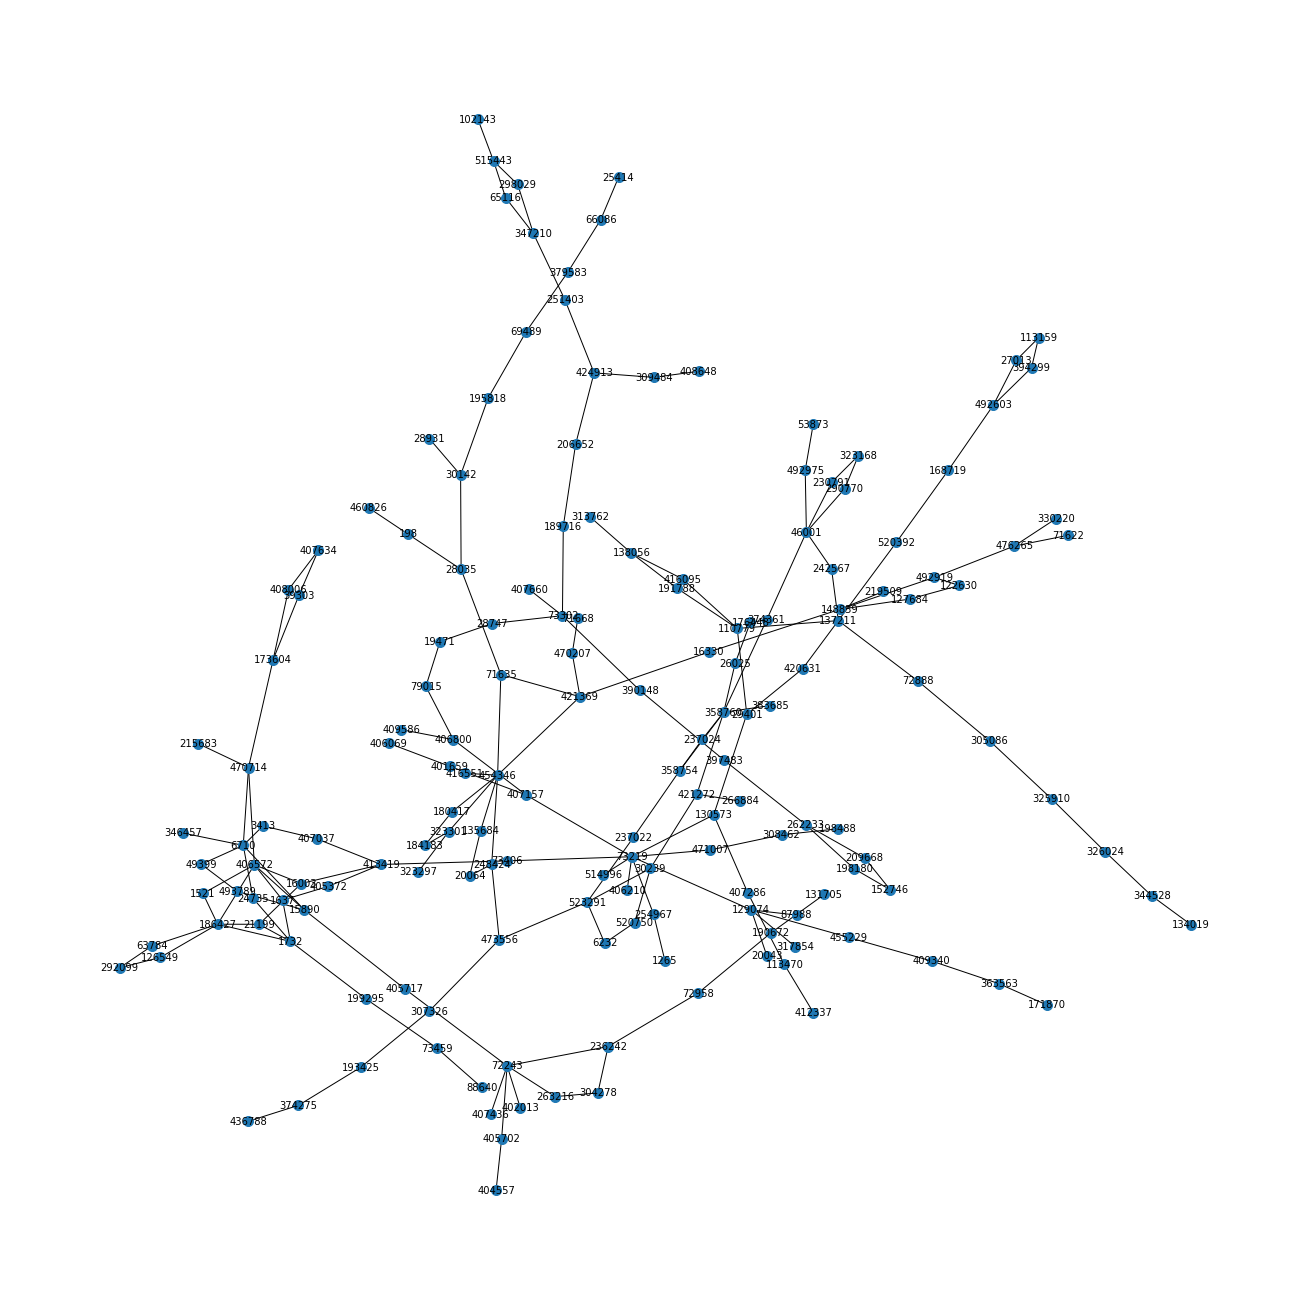

In [127]:
H = AML.subgraph(selected_nodes)
import matplotlib.pyplot as plt
plt.figure(figsize=(18,18)) 
nx.draw_spring(H,with_labels=True,node_size=100,font_size=10)
     


In [131]:
H.degree()

DegreeView({'323297': 1, '476265': 3, '209668': 2, '416095': 2, '402013': 1, '30142': 3, '292099': 2, '184183': 2, '344528': 2, '29401': 3, '16330': 2, '493789': 2, '130573': 3, '406210': 1, '307326': 2, '28747': 2, '79015': 2, '28931': 1, '412337': 1, '237024': 2, '492975': 2, '406800': 3, '71622': 1, '1265': 1, '313762': 1, '195818': 2, '406069': 1, '436788': 1, '520392': 2, '266884': 1, '186427': 6, '405702': 2, '290770': 2, '168719': 2, '397483': 2, '148839': 4, '317854': 1, '26025': 2, '248424': 3, '383685': 1, '49399': 2, '262233': 3, '492603': 3, '407634': 2, '65116': 2, '127684': 2, '171870': 1, '25414': 1, '3413': 2, '407660': 1, '409586': 1, '73219': 8, '198180': 2, '251403': 2, '347210': 3, '102143': 1, '304278': 2, '137211': 5, '122630': 2, '230791': 2, '206652': 2, '21199': 3, '69489': 2, '72888': 2, '6232': 2, '390148': 2, '191788': 2, '405717': 2, '346457': 1, '305086': 2, '199295': 2, '134019': 1, '173604': 3, '152746': 2, '454346': 7, '421369': 4, '394299': 2, '129074'

In [136]:
#ADDED BY ME
degreeH_dict = dict(AML.degree(AML.nodes()))
nx.set_node_attributes(AML, degreeH_dict, 'degree')

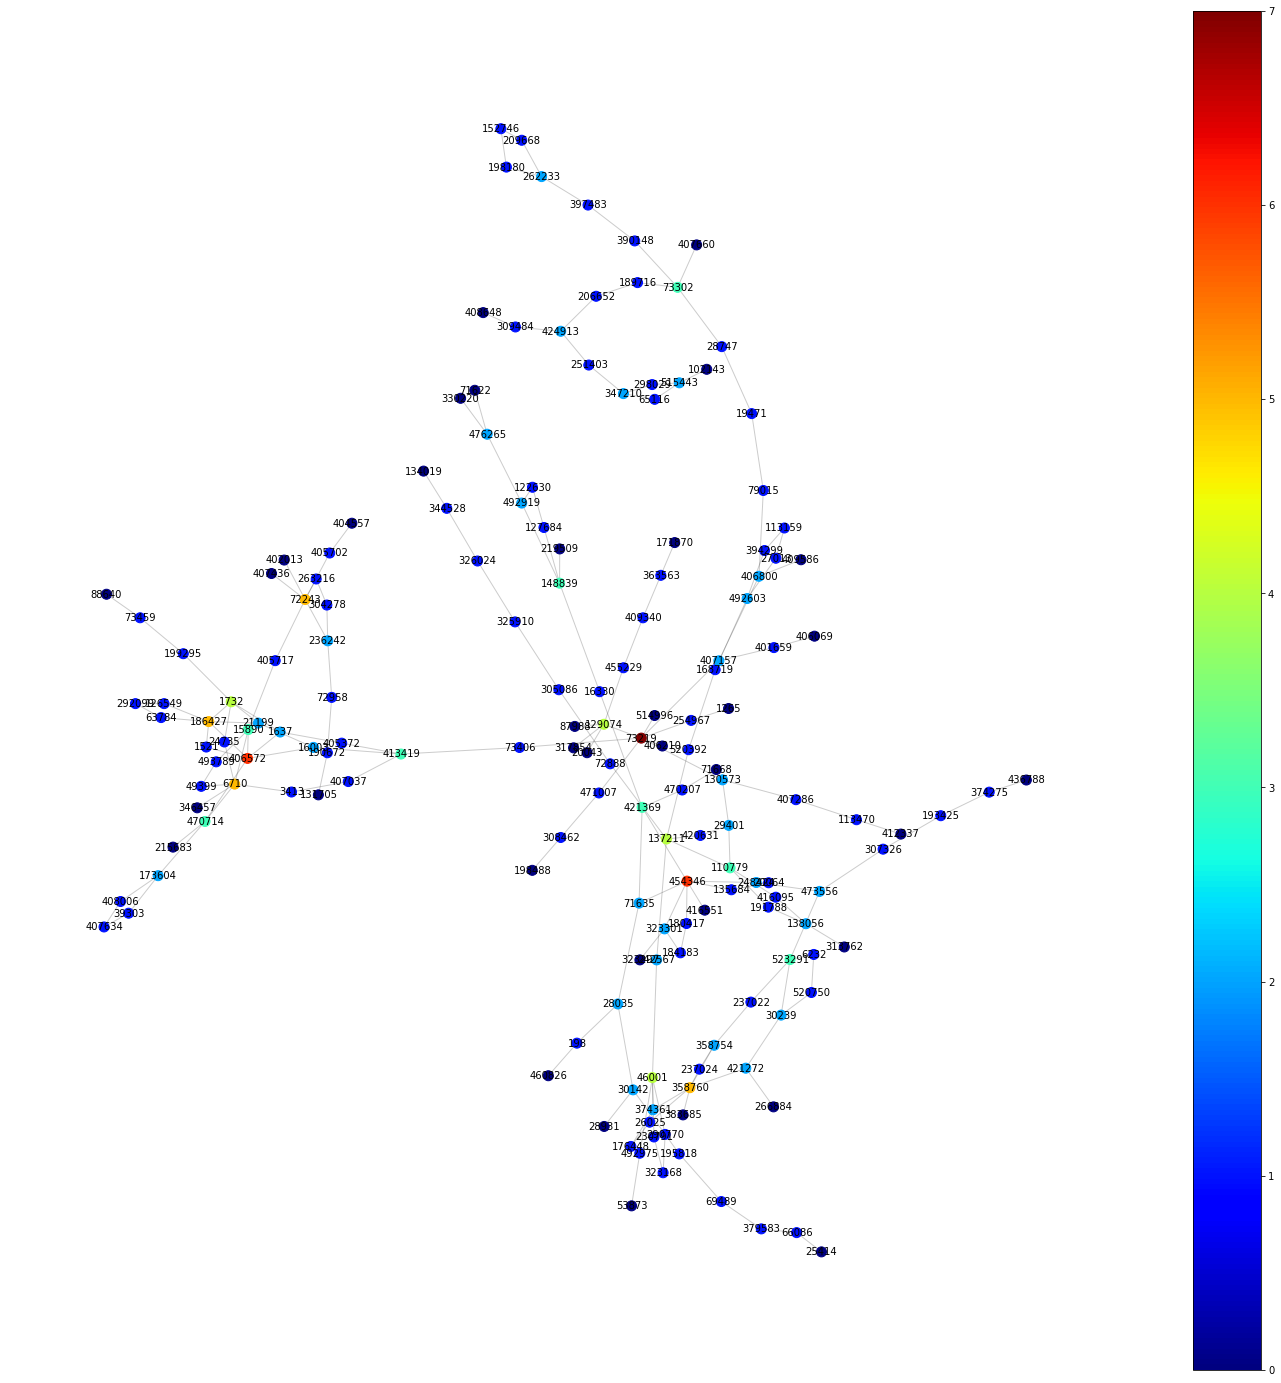

In [135]:
import matplotlib.pyplot as plt
from itertools import count

plt.figure(figsize=(25,25)) 
groups = set(nx.get_node_attributes(H,'degree').values())
mapping = dict(zip(sorted(groups),count()))
nodes = H.nodes()
colors = [mapping[H.nodes[n]['degree']] for n in nodes]

# drawing nodes and edges separately so we can capture collection for colobar
pos = nx.spring_layout(H)
ec = nx.draw_networkx_edges(H, pos, alpha=0.2, label=True)
nc = nx.draw_networkx_nodes(H, pos, nodelist=nodes, node_color=colors, 
                             node_size=100, cmap=plt.cm.jet)
nx.draw_networkx_labels(H,pos,font_size=10)
plt.colorbar(nc)
plt.axis('off')
plt.show()
     
